In [190]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [191]:
df = pd.read_csv(r"C:\Users\DELL\Desktop\cohort_analysis\Dataset_ecommerce - Dataset_ecommerce.csv", 
                parse_dates=['InvoiceDate'])

In [15]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   InvoiceDate  541909 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    541909 non-null  object        
 4   Description  541909 non-null  object        
 5   Quantity     541909 non-null  int64         
 6   UnitPrice    541909 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [20]:
df.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [25]:
df = df.dropna(subset=['CustomerID'])

In [26]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [28]:
df['CustomerID'] = df['CustomerID'].astype(int).astype(str)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  object        
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [36]:
num_customers = df['CustomerID'].nunique()
num_transactions = df['InvoiceNo'].nunique()
num_products = df['StockCode'].nunique()

In [38]:
print(f'Number of unique customers {num_customers}')
print(f'Number of transactions {num_transactions}')
print(f'Number of products {num_products}')

Number of unique customers 4372
Number of transactions 22190
Number of products 9000


In [42]:
date_range = (df['InvoiceDate'].min(), df['InvoiceDate'].max())

In [43]:
print(f'Transaction Period: {date_range[0]}, {date_range[1]}')

Transaction Period: 2010-12-01 08:26:00, 2011-12-09 12:50:00


In [47]:
print(f'Rows with negative quantity: {(df.Quantity <=0).sum()}')

Rows with negative quantity: 0


In [48]:
print(f'Rows with negative UnitPrice: {(df.UnitPrice <=0).sum()}')

Rows with negative UnitPrice: 0


In [50]:
top_countries = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False).head()

In [51]:
print(top_countries)

Country
Mozambique      3072
Benin           3054
Togo            3053
Nigeria         3051
Burkina Faso    3049
Name: CustomerID, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_18404\700685676.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


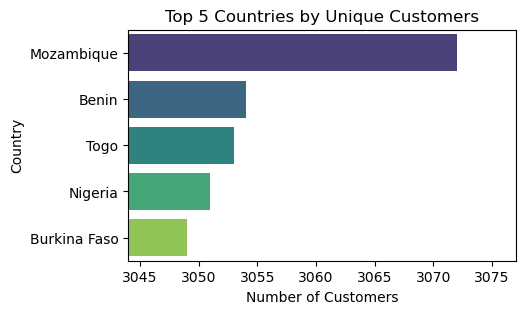

In [55]:
plt.figure(figsize=(5,3))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.xlim(min(top_countries.values) -5, max(top_countries.values) +5)
plt.title('Top 5 Countries by Unique Customers')  
plt.xlabel('Number of Customers') 
plt.ylabel('Country')
plt.show()
            

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   InvoiceDate  541909 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    541909 non-null  object        
 4   Description  541909 non-null  object        
 5   Quantity     541909 non-null  int64         
 6   UnitPrice    541909 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [59]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

In [62]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [64]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,Revenue
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12,664.95
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12,1862.95
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali,2010-12,4796.22
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12,370.95
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12,1941.50


In [66]:
monthly_sales = df.groupby('InvoiceMonth')['Revenue'].sum().reset_index()

In [67]:
monthly_sales

,InvoiceMonth,Revenue
0,2010-12,1.074755e+08
1,2011-01,8.992345e+07
2,2011-02,7.084334e+07
3,2011-03,9.405881e+07
4,2011-04,7.645651e+07
5,2011-05,9.444925e+07
6,2011-06,9.406814e+07
7,2011-07,1.011336e+08
8,2011-08,8.990215e+07
9,2011-09,1.278981e+08


In [68]:
monthly_sales['InvoiceMonth'] = monthly_sales['InvoiceMonth'].astype(str)

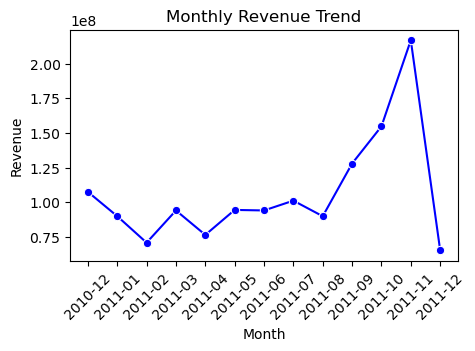

In [73]:
plt.figure(figsize=(5,3))
sns.lineplot(x='InvoiceMonth', y='Revenue', data=monthly_sales, marker='o', color='blue')  # Added closing parenthesis here
plt.title('Monthly Revenue Trend')  
plt.xlabel('Month') 
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Cohort Analysis

In [74]:
cohort_data = df.groupby('CustomerID')['InvoiceMonth'].min()

In [75]:
cohort_data.name = 'CohortMonth'

In [76]:
cohort_data

CustomerID
12346.0    2011-01
12347.0    2010-12
12348.0    2010-12
12349.0    2011-11
12350.0    2011-02
            ...   
18280.0    2011-03
18281.0    2011-06
18282.0    2011-08
18283.0    2011-01
18287.0    2011-05
Name: CohortMonth, Length: 4372, dtype: period[M]

In [79]:
df = df.merge(cohort_data, on='CustomerID')

In [80]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,Revenue,CohortMonth
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12,664.95,2010-12
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12,1862.95,2010-12
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali,2010-12,4796.22,2010-12
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12,370.95,2010-12
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12,1941.50,2010-12


In [81]:
invoice_year, invoice_month = df['InvoiceMonth'].dt.year, df['InvoiceMonth'].dt.month

In [82]:
cohort_year, cohort_month = df['CohortMonth'].dt.year, df['CohortMonth'].dt.month

In [85]:
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month

In [87]:
df['CohortIndex'] = year_diff * 12 + month_diff + 1
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,Revenue,CohortMonth,CohortIndex
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12,664.95,2010-12,1
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12,1862.95,2010-12,1
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali,2010-12,4796.22,2010-12,1
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12,370.95,2010-12,1
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12,1941.50,2010-12,1


In [93]:
cohort_counts = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

In [95]:
cohort_pivot = cohort_counts.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

In [96]:
cohort_pivot

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
cohort_size = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_size, axis=0).round(3)
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.382,0.334,0.387,0.360,0.397,0.380,0.354,0.354,0.395,0.373,0.50,0.274
2011-01,1.0,0.240,0.283,0.242,0.328,0.299,0.261,0.257,0.311,0.347,0.368,0.15,NaN
2011-02,1.0,0.247,0.192,0.279,0.268,0.247,0.255,0.282,0.258,0.313,0.092,NaN,NaN
2011-03,1.0,0.191,0.255,0.218,0.232,0.177,0.264,0.239,0.289,0.089,NaN,NaN,NaN
2011-04,1.0,0.227,0.221,0.211,0.207,0.237,0.231,0.261,0.084,NaN,NaN,NaN,NaN
2011-05,1.0,0.237,0.172,0.172,0.215,0.244,0.265,0.104,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.209,0.187,0.272,0.247,0.336,0.102,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.209,0.204,0.230,0.272,0.115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.251,0.251,0.251,0.138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


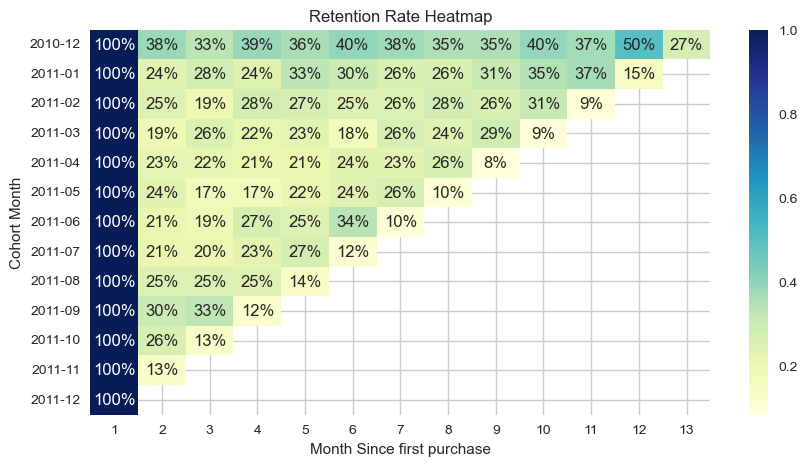

In [207]:
plt.figure(figsize=(10,5))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Retention Rate Heatmap')
plt.xlabel('Month Since first purchase')
plt.ylabel('Cohort Month')
plt.savefig('Retention_heatmap.png')
plt.show()

In [105]:
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
reference_date

Timestamp('2011-12-10 12:50:00')

In [107]:
df.columns

Index(['InvoiceNo', 'InvoiceDate', 'CustomerID', 'StockCode', 'Description',
       'Quantity', 'UnitPrice', 'Country', 'InvoiceMonth', 'Revenue',
       'CohortMonth', 'CohortIndex'],
      dtype='object')

In [108]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate':lambda x: (reference_date - x.max()).days,
    'InvoiceNo': pd.Series.nunique,
    'Revenue': 'sum'
}).reset_index()

In [109]:
rfm.columns = ['CustomerID', 'recency_days', 'frequency', 'monetary']

In [111]:
rfm.head()

,CustomerID,recency_days,frequency,monetary
0,12346.0,326,2,5342.40
1,12347.0,2,7,431501.00
2,12348.0,75,4,82378.47
3,12349.0,19,1,176075.12
4,12350.0,310,1,48173.37


In [110]:
rfm.describe()

,CustomerID,recency_days,frequency,monetary
count,4372.000000,4372.000000,4372.000000,4.372000e+03
mean,15299.677722,92.047118,5.075480,2.372909e+05
std,1722.390705,100.765435,9.338754,5.944603e+05
min,12346.000000,1.000000,1.000000,1.736000e+01
25%,13812.750000,17.000000,1.000000,4.350893e+04
50%,15300.500000,50.000000,3.000000,1.066925e+05
75%,16778.250000,143.000000,5.000000,2.599154e+05
max,18287.000000,374.000000,248.000000,2.038383e+07


In [112]:
rfm.columns

Index(['CustomerID', 'recency_days', 'frequency', 'monetary'], dtype='object')

In [113]:
X = rfm[['recency_days', 'frequency', 'monetary']].copy()

In [122]:
from sklearn.preprocessing import StandardScaler

In [123]:
ss = StandardScaler()

In [124]:
X_scaled = ss.fit_transform(X)

In [125]:
X_scaled[:5]

array([[ 2.32202285, -0.32936215, -0.39022789],
       [-0.89373323,  0.20610242,  0.32673724],
       [-0.1691956 , -0.11517632, -0.26062315],
       [-0.72500529, -0.43645506, -0.1029888 ],
       [ 2.16322008, -0.43645506, -0.31816948]])

In [147]:
from sklearn.cluster import KMeans

In [148]:
from sklearn.metrics import silhouette_score

In [179]:
inertia = []
s_scores = np.random.rand(10)
K_range = range(2,11) 

In [186]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    # Only calculate silhouette score if k > 1 and we have more than one cluster
    if k > 1 and len(np.unique(cluster_labels)) > 1:
        s_score.append(silhouette_score(X, cluster_labels))
    else:
        s_score.append(0)  # Default value if silhouette score can't be calculated
  

Text(0, 0.5, 'Inertia')

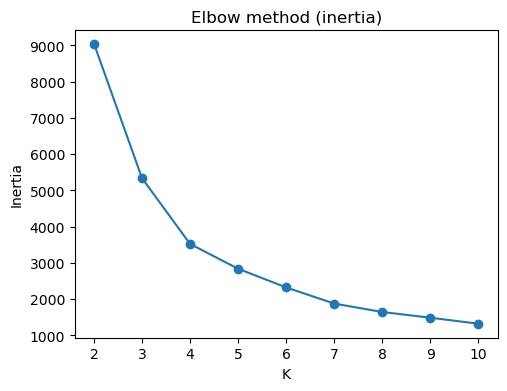

In [187]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow method (inertia)')
plt.xlabel('K')
plt.ylabel('Inertia')

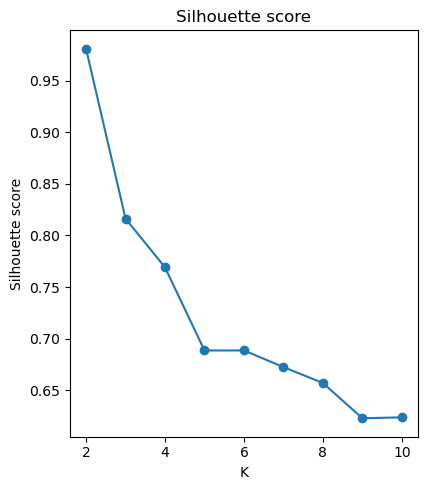

In [188]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,2)
plt.plot(K_range, s_score, marker='o')
plt.title('Silhouette score')
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.tight_layout()
plt.show()

pip install yellowbrick

In [193]:
from yellowbrick.cluster import KElbowVisualizer

In [194]:
model = KMeans(random_state=42)

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=42),
                 k=(2, 10))

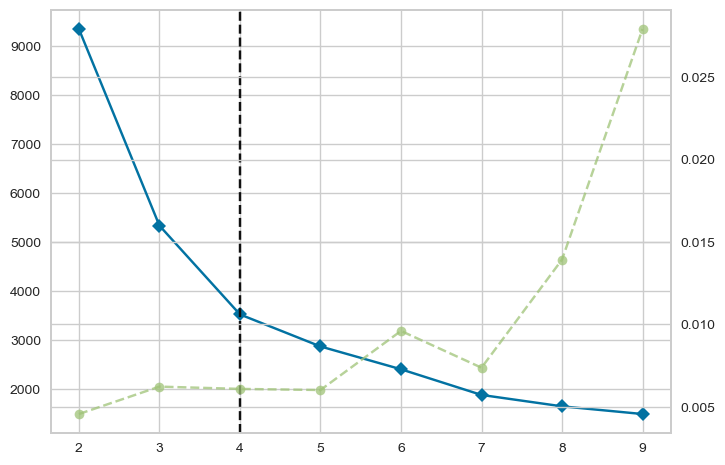

In [196]:
v = KElbowVisualizer(model, k=(2,10))
v.fit(X_scaled)

In [197]:
final_k = 4
final_model = KMeans(n_clusters=final_k, random_state=42)

In [198]:
final_model.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [199]:
rfm.head()

,CustomerID,recency_days,frequency,monetary
0,12346.0,326,2,5342.40
1,12347.0,2,7,431501.00
2,12348.0,75,4,82378.47
3,12349.0,19,1,176075.12
4,12350.0,310,1,48173.37


In [201]:
rfm['Cluster'] = final_model.labels_

In [202]:
rfm.head()

,CustomerID,recency_days,frequency,monetary,Cluster
0,12346.0,326,2,5342.40,1
1,12347.0,2,7,431501.00,0
2,12348.0,75,4,82378.47,0
3,12349.0,19,1,176075.12,0
4,12350.0,310,1,48173.37,1


In [209]:
cluster_profile = rfm.groupby('Cluster').agg({
    'recency_days': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'NumCustomers'}).round(1)

In [206]:
cluster_profile

,recency_days,frequency,monetary,NumCustomers
Cluster,,,,
0,43.4,4.2,195421.0,3023
1,248.9,1.8,69191.6,1077
2,1.7,153.5,12345024.6,6
3,11.8,25.3,1120633.6,266
